# Programming for Economics, Group 26—PS2

In [1]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from tabulate import tabulate
os.chdir('/Users/anniecadanie/Programming for Economics') # Setting working directory
# from data_functions_albert import remove_outliers, gini, plot_cond_log_distr

In [2]:
# Importing the 2011-2012 Ugandan National Panel Survey data as df_Uganda
df_Uganda = pd.read_excel('/Users/anniecadanie/Programming for Economics/Week 3/UNPS_1112_PS2.xls')

# Exercise 1. Exploring the Data

In [3]:
'''
Exercise 1a) Are there duplicate households in the data? That is check if there are repeated observations in 
the unique household identifier variable (’hhid’). How many observations are there in the data?
'''

# Checking for duplicate households (True means all households are unique, so there are no duplicates)
duplicate_households = df_Uganda["hhid"].is_unique

if duplicate_households == True:
    print('There are no duplicate households in the data; all observations are unique.')
else:
    print('There are duplicate households in the data.')

# Counting number of observations in the data
observation_count = df_Uganda['hhid'].count()
print('There are', observation_count,'observations in the data.')

There are no duplicate households in the data; all observations are unique.
There are 2613 observations in the data.


In [4]:
'''
Exercise 1b) Present some basic summary statistics for the following variables: head_gender, head_age, familysize, 
consumption, income, wealth. Comment your results in 2 lines. In particular, you might mention if there are 
missing observations or potential outliers for some of the variables.
'''

sum_df_Uganda = df_Uganda[['head_gender','head_age', 'familysize', 'consumption','income','wealth']].describe()
headers1b = ['Summary','head_gender','head_age', 'familysize', 'consumption','income','wealth']
print(tabulate((sum_df_Uganda), headers=headers1b))

print('''
There are a total of 2613 observation in the data. Consumption, income, and wealth have a data count of 2613, so 
they are not missing any observations. On the other hand, head_gender, head_age, and family size have a data count
of 2597, which is less than 2613, so they are each missing 16 observations.

There appears to be potential outliers for head_age, familysize, consumption, income, and wealth. Head_gender does 
not have any outliers, since it is a dummy variable and the summary statistics do not indicate any mistypes in the 
data. Head_age likely has high outliers. The largest observation for head_age is 100, while the inter-quartile 
range is between 34 and 56. Using the outlier equation, Q3 + 1.5(IQR), observations above 89 are considered
outliers, so there is at least one outlier in head_age. Familysize also has high outliers, as the largest 
observation is 33, while the interquartile range is between 5 and 9. For familysize, any observation above 15 is
considered to be an outlier. Consumption, income, and wealth potentially have high outliers as well, but
the typical distribution of the three variables are usually right-skewed regardless.
''')

Summary      head_gender    head_age    familysize    consumption      income    wealth
---------  -------------  ----------  ------------  -------------  ----------  --------
count        2597          2597         2597             2613       2613        2613
mean            1.31421      46.0682       7.48055       1803.79    1860.08     4912.7
std             0.464289     15.069        3.71253       1308.74    2607.52     8359.89
min             1            14            1              250.306     27.4869      0
25%             1            34            5              918.325    471.204     720.02
50%             1            44            7             1426.61    1061.19     2108.6
75%             2            56            9             2296.86    2234.8      5221.94
max             2           100           33             8369.9    52137.7     76396.3

There are a total of 2613 observation in the data. Consumption, income, and wealth have a data count of 2613, so 
they are not m

In [5]:
'''
Exercise 1c) Using the head_gender variable, create a dummy variable for household head being female 
(1=female, 0=male). Be careful with missing values. What is the proportion of households where the head is female?
'''

df_Uganda['female_head'] = np.nan # Creating an empty dummy variable
df_Uganda.loc[df_Uganda['head_gender'] == 1,'female_head'] = 0 # Replacing observations for 'Male' with 0
df_Uganda.loc[df_Uganda['head_gender'] == 2,'female_head'] = 1 # Replacing observations for 'Female' with 1

female_heads = df_Uganda['female_head'].value_counts()[1] # Calculating proportion of female household heads
total_heads = df_Uganda['female_head'].count()
proportion_female_heads = female_heads/total_heads

print('The proportion of households where the head is female is', proportion_female_heads)

The proportion of households where the head is female is 0.31420870234886406


In [6]:
'''
Exercise 1d) Using the groupby method, compute the average consumption, average household size, and average 
household head age for households where the head is male vs where the head is female. Do we observe noticeable 
differences across the two groups?
'''

headers1d = ['female_head','consumption','familysize','head_age']
print(tabulate(df_Uganda.groupby('female_head')[['consumption','familysize','head_age']].mean(), headers=headers1d))

print('''
For households with a male head, consumption is greater on average by $305, and family size is greater on average 
by 0.76 members. For households with a female head, the household head is older on average by 5 years.
''')

  female_head    consumption    familysize    head_age
-------------  -------------  ------------  ----------
            0        1898.3        7.72094     44.3885
            1        1593.26       6.95588     49.7341

For households with a male head, consumption is greater on average by $305, and family size is greater on average 
by 0.76 members. For households with a female head, the household head is older on average by 5 years.



# Exercise 2. Inequality in Uganda

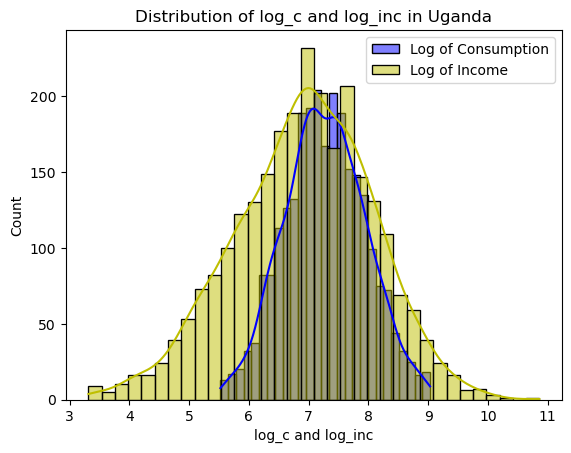


Both distributions closely resemble the normal distribution; neither distribution is significantly skewed in either
direction.

Inequality is higher in income compare to consumption due to its greater spread.



In [7]:
'''
Exercise 2a) Create the variables log_c, log_inc, log_w that are the log of consumption, income, and wealth, 
respectively. Plot in the same graph the distribution of the log of consumption and the log of income. Do the 
distributions resemble some known distribution? Is inequality higher in consumption or in income?
'''

# Checking for any zeroes that need to be replaced by a small value for log calculation

df_Uganda[['consumption','income','wealth']].describe()

# 'wealth' has some zeroes; replacing all zeroes in 'wealth' with 0.01 ($0.01) so we can generate its 
# log variable

df_Uganda['wealth'].replace(0, 0.01, inplace=True)

# Generating variables for the logs of consumption, income, and wealth

df_Uganda['log_c'] = np.log(df_Uganda['consumption'])
df_Uganda['log_inc'] = np.log(df_Uganda['income'])
df_Uganda['log_w'] = np.log(df_Uganda['wealth'])

# Plotting the distributions of the log of consumption and the log of income

fig, ax = plt.subplots()
sns.histplot(data=df_Uganda['log_c'], label='Log of Consumption', kde=True, color='b')
sns.histplot(data=df_Uganda['log_inc'], label='Log of Income', kde=True, color='y')

plt.title("Distribution of log_c and log_inc in Uganda")
plt.xlabel('log_c and log_inc')
plt.legend()
plt.show()

print('''
Both distributions closely resemble the normal distribution; neither distribution is significantly skewed in either
direction.

Inequality is higher in income compare to consumption due to its greater spread.
''')

In [8]:
'''
Exercise 2b) A commonly used statistic to measure inequality is the variance of the logs. Compute the variance of 
the log of consumption, of the log of income, and of the log of wealth. How do these measures of inequality in 
Uganda compare to the same measures of inequality in the United States? Use table 3, column 5–PSID in De Magalhães,
L., & Santaeulàlia-Llopis, R.(2018) for the comparison.
'''

# Calculating the variances for each logged variable
variance_data = df_Uganda[['log_c','log_inc','log_w']].var()

# Creating a table to display the variances
variables2b = ['log_c','log_inc','log_w']
variance_data = variance_data.tolist() # Converting variance data to list
df_variance_data = pd.DataFrame(data = variance_data, index = variables2b) # Converting data to dataframe for tabulate
df_variance_data['US Variance'] = [0.79,1.97,2.11] # Adding US Variance data

print(tabulate(df_variance_data, headers=['Variable','Uganda Variance','US Variance']))

print('''
The measures of inequality for Uganda are as follows: the variance of the log of consumption is 0.45, the variance
of the log of income is 1.34, and the variance of wealth is 3.549.

For the United States, De Magalhães, L., & Santaeulàlia-Llopis, R.(2018) make use of data from the Panel Study of
Income Dynamics (PSID), which provides household level panel data on earnings, income, consumption expenditures 
and wealth for the U.S. The same measures of inequality for the United States are as follows: the variance of the 
log of consumption is 0.79, the variance of the log of income is 1.97, and the variance of wealth is 2.11. 

Comparing the two countries, the variance of the logs of consumption and income are greater in the United States
compared to in Uganda, while the variance of the log of wealth is greater in Uganda. However, it is likely that
the variance of the log of wealth is also greater in United States due to 'the inability of the PSID 
to recover the top of the wealth distribution.' (De Magalhães & Santaeulàlia-Llopis, 2018). Indeed, the SCF wealth 
variance produced a value of 4.53. This means that the United States has greater consumption, income, and likely 
wealth distributions compared to Uganda, and thus higher levels of inequality.
''')

Variable      Uganda Variance    US Variance
----------  -----------------  -------------
log_c                 0.44956           0.79
log_inc               1.33874           1.97
log_w                 3.54934           2.11

The measures of inequality for Uganda are as follows: the variance of the log of consumption is 0.45, the variance
of the log of income is 1.34, and the variance of wealth is 3.549.

For the United States, De Magalhães, L., & Santaeulàlia-Llopis, R.(2018) make use of data from the Panel Study of
Income Dynamics (PSID), which provides household level panel data on earnings, income, consumption expenditures 
and wealth for the U.S. The same measures of inequality for the United States are as follows: the variance of the 
log of consumption is 0.79, the variance of the log of income is 1.97, and the variance of wealth is 2.11. 

Comparing the two countries, the variance of the logs of consumption and income are greater in the United States
compared to in Uganda, whil

In [9]:
'''
Exercise 2c) Measuring between rural and urban inequality in Uganda. Compute the average consumption, income, and 
wealth for rural and urban areas separately (groupby). Are the differences between the two areas large?
'''

variables2c = ['Urban','Avg Consumption','Avg Income','Avg Wealth']
print(tabulate(df_Uganda.groupby('urban')[['consumption','income','wealth']].mean(), headers=variables2c))

print('''
Consumption in the data is the sum of food consumption and non-durables non-food consumption. Income in the data 
is the sum of agriculture, wage labor, business, and livestock. Wealth in the data is the sum of household assets,
farming capital, and estimated value of land. 

The average annual difference between consumption, income, and wealth between urban and rural areas is 
approximately $914.77, $766.66, and $2,055.26, respectively, all of which are quite large differences. This 
indicates large rural and urban inequality of households in Uganda.
''')

  Urban    Avg Consumption    Avg Income    Avg Wealth
-------  -----------------  ------------  ------------
      0            1629.45       1713.96       4521
      1            2544.22       2480.62       6576.26

Consumption in the data is the sum of food consumption and non-durables non-food consumption. Income in the data 
is the sum of agriculture, wage labor, business, and livestock. Wealth in the data is the sum of household assets,
farming capital, and estimated value of land. 

The average annual difference between consumption, income, and wealth between urban and rural areas is 
approximately $914.77, $766.66, and $2,055.26, respectively, all of which are quite large differences. This 
indicates large rural and urban inequality of households in Uganda.



In [10]:
'''
Exercise 2d) Measuring within rural and urban inequality in Uganda. Compute the variance of the log of consumption,
income, and wealth for rural and urban areas separately (groupby).
'''

variables2d = ['Urban','Var Log Consumption','Var Log Income','Var Log Wealth']
print(tabulate(df_Uganda.groupby('urban')[['log_c','log_inc','log_w']].var(), headers=variables2d))

print('''
The variance in the log of consumption is comparable between urban and rural areas, with urban households having 
a slightly higher variance compared to rural households. The variance in the log of income is slightly greater in 
rural versus urban areas, which could be because in rural areas, the markets may be less competitive, so some 
rural businesses may have an advantage in generating income compared to other rural businesses, while in urban 
areas, jobs are more competitive, so the variance of log income is smaller. Finally, the variance of the log of 
wealth is more than two times greater in urban compared to rural areas. This indicates that wealth inequality is 
significantly higher in urban than in rural areas.
''')

  Urban    Var Log Consumption    Var Log Income    Var Log Wealth
-------  ---------------------  ----------------  ----------------
      0               0.413955           1.34247           2.79652
      1               0.439342           1.10794           6.67421

The variance in the log of consumption is comparable between urban and rural areas, with urban households having 
a slightly higher variance compared to rural households. The variance in the log of income is slightly greater in 
rural versus urban areas, which could be because in rural areas, the markets may be less competitive, so some 
rural businesses may have an advantage in generating income compared to other rural businesses, while in urban 
areas, jobs are more competitive, so the variance of log income is smaller. Finally, the variance of the log of 
wealth is more than two times greater in urban compared to rural areas. This indicates that wealth inequality is 
significantly higher in urban than in rural areas.



In [11]:
'''
Exercise 2e) Compute the Gini coefficient in consumption, in income, and in wealth in Uganda. Compare these values 
with the Gini coefficients in the United States—table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, 
R. (2018)
'''

# Defining Gini function from sources: https://github.com/oliviaguest/gini and 
# http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm

def gini(array):
    array = np.array(array)
    array = array.flatten() 
    if np.amin(array) < 0:
        array += np.amin(array) 
    array += 0.0000001 
    array = np.sort(array) 
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

gini_coef = df_Uganda[['consumption','income','wealth']].apply(gini)

# Creating a table to display the Gini coefficients
variables2e = ['consumption','income','wealth']
gini_coef = gini_coef.tolist() # Converting Gini coefficient series to list
df_gini = pd.DataFrame(data = gini_coef, index = variables2e) # Converting data to dataframe for tabulate
df_gini['US Gini Coeff'] = [0.41,0.44,0.79] # Adding US Gini data

print(tabulate(df_gini, headers=['Variable','Uganda Gini Coeff','US Gini Coeff']))

print('''
The Gini coefficient is the most widely used summary measure of inequality in the distribution of household income.
It is a measure of the way in which different household groups receive differing shares, more specifically less 
than equal shares, of total household income. The coefficient ranges from 0 to 100, with 0 representing perfect
equality and 1 representing perfect inequality.

As seen in the table above, the US exhibits greater inequality in consumption and wealth, while Uganda exhibits 
greater inequality in income. The US exhibiting greater inequality in consumption and wealth is potentially due to
its overall higher GDP, which allows some extremely wealthy households to enjoy extravagant consumption. The 
reason that Uganda has a higher Gini in income could potentially attributed to the competitive US labour market,
though more research is needed to obtain a credible reason.
''')

Variable       Uganda Gini Coeff    US Gini Coeff
-----------  -------------------  ---------------
consumption             0.365717             0.41
income                  0.555572             0.44
wealth                  0.656828             0.79

The Gini coefficient is the most widely used summary measure of inequality in the distribution of household income.
It is a measure of the way in which different household groups receive differing shares, more specifically less 
than equal shares, of total household income. The coefficient ranges from 0 to 100, with 0 representing perfect
equality and 1 representing perfect inequality.

As seen in the table above, the US exhibits greater inequality in consumption and wealth, while Uganda exhibits 
greater inequality in income. The US exhibiting greater inequality in consumption and wealth is potentially due to
its overall higher GDP, which allows some extremely wealthy households to enjoy extravagant consumption. The 
reason that Uganda ha

In [12]:
'''
Exercise 2f) Compute the share of the wealth that the bottom 50 percent hold. Compute the share of the wealth that 
the top 10, 5, and 1 percent hold.
'''
percentile = np.array([0,0.5,0.90, 0.95, 0.99, 1])

df_Uganda['wealth'].replace(0, np.nan,inplace=True) # Replacing all infinities in log_w with NaNs
wealth_array = np.sort(np.array(df_Uganda['wealth'].dropna())) # Dropping Nans
wealth_total = sum(wealth_array) # Calculating total wealth
n=len(wealth_array) # Counting total number of observations
percentile_observation = n*percentile # Calculating the observation at each relevant percentile
percentile_observation = percentile_observation.tolist() # Converting percentile observation series to list
percentile_observation = [int(x) for x in percentile_observation] # Rounding each observation to nearest integer

# Creating lists of observations at each relevant percentile for the bottom and top of the distribution
bottom = percentile_observation[0:2]
top = percentile_observation[2:15]

# Calculating shares and creating lists for the relevant bottom and top percentiles
shares_bottom= []
for i in range(1,len(bottom)):
    bottom_share = sum(wealth_array[bottom[0]:bottom[i]])/wealth_total
    shares_bottom.append(bottom_share)
shares_top = []
for i in range(0,len(top)-1):
    top_share = sum(wealth_array[top[i]:top[3]])/wealth_total
    shares_top.append(top_share)   
        
# Creating DataFrame for wealth share percentiles
wealth_shares_data = [] # Shares data list
for group in [shares_bottom, shares_top]:
    for value in group:
        wealth_shares_data.append(value)
    
percentile_list = ['0-50%','90-100%','95-100%','99-100%'] # List for row names
df_Uganda_wealth_percentiles = pd.DataFrame(data=wealth_shares_data, index = percentile_list) # Creating DataFrame

print(tabulate(df_Uganda_wealth_percentiles, headers=['Percentile','Wealth Shares in Uganda']))

Percentile      Wealth Shares in Uganda
------------  -------------------------
0-50%                         0.0821056
90-100%                       0.511063
95-100%                       0.352477
99-100%                       0.119089


In [13]:
'''
Exercise 2g) Although in the last years, there has been a big debate on inequality, the debate has mostly focused 
on rich countries. From your results of this exercise, is inequality large in Uganda? Should we also be concerned 
about inequality in low-income countries such as Uganda?
'''

print('''
As seen in the percentiles table above, the top 10% of households hold approximately half of the wealth of Uganda,
while the bottom 50% hold approximately 8%. This is an extremely disproportionate distribution of income and 
signals high wealth inequality. In the United States, the top ten percent of households own 76% of all wealth, 
while the bottom 50% of households own just 1% of all wealth, which is an even more jarring difference 
(Statista 2023). While inequality is incontestably larger in the US, there is still evidence of high inequality
in low-income countries such as Uganda, both in metrics such as consumption, income, and wealth, as well as
between rural and urban regions. In fact, it is likely that even though rich countries exhibit higher inequality,
than low-income countries, those at the lower end of the rich countries still enjoy higher standards of living
compared to those at the lower end of the poor countries, as the large inequality of rich countries occurs 
primarily due to the extreme rich. This means that we should in fact be more concerned about inequality in 
low-income countries if our goal is to improve net living standards for all.
''')


As seen in the percentiles table above, the top 10% of households hold approximately half of the wealth of Uganda,
while the bottom 50% hold approximately 8%. This is an extremely disproportionate distribution of income and 
signals high wealth inequality. In the United States, the top ten percent of households own 76% of all wealth, 
while the bottom 50% of households own just 1% of all wealth, which is an even more jarring difference 
(Statista 2023). While inequality is incontestably larger in the US, there is still evidence of high inequality
in low-income countries such as Uganda, both in metrics such as consumption, income, and wealth, as well as
between rural and urban regions. In fact, it is likely that even though rich countries exhibit higher inequality,
than low-income countries, those at the lower end of the rich countries still enjoy higher standards of living
compared to those at the lower end of the poor countries, as the large inequality of rich countries occurs 
prima

In [14]:
'''
Exercise 2h) The few previous studies on income inequality in Africa have mostly used consumption measures to 
estimate income inequality. See, for example, Alvaredo & Gasparini (2005). From your results of this exercise, what
do you think about these estimates? Are they overestimating or underestimating income inequality in Africa?
'''

print('''
From the results of this exercise, in particular the Gini coefficients of inequality, the greatest sources of
inequality in Uganda seems to be wealth (0.65) and income (0.55) rather than consumption (0.36). The Gini 
coefficients for wealth and income are fairly close to one another compared to consumption, which indicates that
income inequality is often underestimated in Africa. There is likely greater inequality in Africa than indicated 
by the consumption measures.
''')


From the results of this exercise, in particular the Gini coefficients of inequality, the greatest sources of
inequality in Uganda seems to be wealth (0.65) and income (0.55) rather than consumption (0.36). The Gini 
coefficients for wealth and income are fairly close to one another compared to consumption, which indicates that
income inequality is often underestimated in Africa. There is likely greater inequality in Africa than indicated 
by the consumption measures.



# Exercise 3. The Life-Cycle of Male vs Female Head Households in Uganda

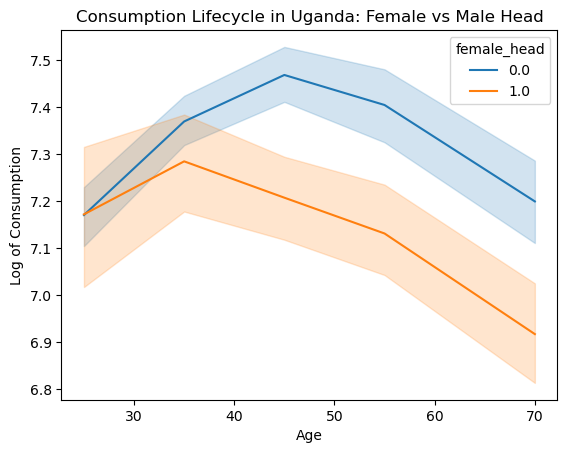

In [15]:
'''
Exercise 3a) Plot the lifecycle of the log of consumption for households where the head is male and for households 
where the head is female.
'''

# Droping extreme values (too few observations to get means within age)
df_Uganda = df_Uganda[df_Uganda['head_age'] < 80]
df_Uganda = df_Uganda[df_Uganda['head_age'] >18]

# Group the ages in bins to smooth the line graphs
bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
df_Uganda['age_bins'] = pd.cut(df_Uganda['head_age'],bins=bins, labels=labels)

# Consumption Lifecycle: Male vs Female Head
fig, ax = plt.subplots()
fig1 = sns.lineplot(x='age_bins',y='log_c', hue='female_head', data=df_Uganda, )
plt.title('Consumption Lifecycle in Uganda: Female vs Male Head')
plt.ylabel('Log of Consumption')
plt.xlabel('Age')
plt.show()

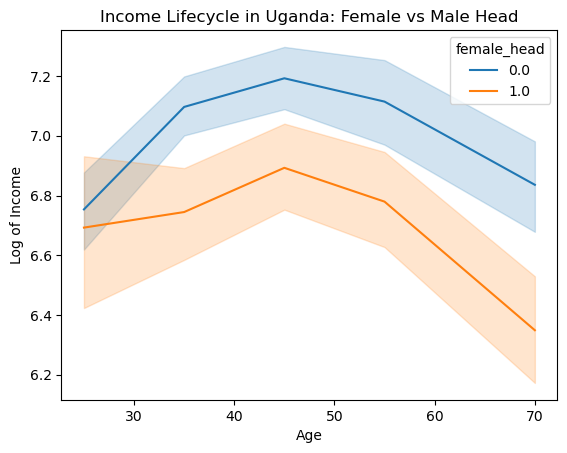

In [16]:
'''
Exercise 3b) Plot the lifecycle of the log of income for households where the head is male and for households where
the head is female.
'''

# Consumption Lifecycle: Male vs Female Head
fig, ax = plt.subplots()
fig1 = sns.lineplot(x='age_bins',y='log_inc', hue='female_head', data=df_Uganda, )
plt.title('Income Lifecycle in Uganda: Female vs Male Head')
plt.ylabel('Log of Income')
plt.xlabel('Age')
plt.show()

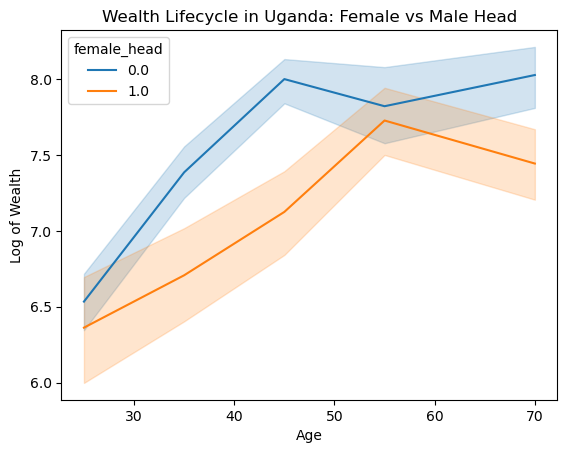

In [17]:
'''
Exercise 3c) Plot the lifecycle of the log of wealth for households where the head is male and for households where
the head is female.
'''

# Consumption Lifecycle: Male vs Female Head
fig, ax = plt.subplots()
fig1 = sns.lineplot(x='age_bins',y='log_w', hue='female_head', data=df_Uganda, )
plt.title('Wealth Lifecycle in Uganda: Female vs Male Head')
plt.ylabel('Log of Wealth')
plt.xlabel('Age')
plt.show()

In [18]:
'''
Exercise 3d) What are the differences in the lifecycle of households where the head is a male versus the head is a 
female?
'''

print('''
Throughout the entire lifecycles of all three inequality measures, households with a female head tend to have 
lower consumption, income, and wealth. Since the variables are in logs, we can interpret the line graphs as 
changes in the growth rate. 

For consumption, the lifecycle is concave—younger households have a slower rate of consumption, which increases up 
to a certain point before decreasing towards the end of the lifecycle. Households with female heads tend to slow 
their rate of consumption before households with male heads. 

Similarly, the lifecycle for income is concave, though there does not seem to be a difference in when the growth 
rate of income for male-lead versus female-lead households begins to fall. 

Finally, the lifecycle of the growth of wealth seems to be an increasing function of time, which indicates that 
for both male and female lead households, wealth seems to accumulate over time at an increasing rate. There is a 
slight decrease in the growth rate of wealth towards the end of the lifecycle, which male lead households 
experience first. Overall, the growth in wealth is slower for female lead households compared to male lead.
''')


Throughout the entire lifecycles of all three inequality measures, households with a female head tend to have 
lower consumption, income, and wealth. Since the variables are in logs, we can interpret the line graphs as 
changes in the growth rate. 

For consumption, the lifecycle is concave—younger households have a slower rate of consumption, which increases up 
to a certain point before decreasing towards the end of the lifecycle. Households with female heads tend to slow 
their rate of consumption before households with male heads. 

Similarly, the lifecycle for income is concave, though there does not seem to be a difference in when the growth 
rate of income for male-lead versus female-lead households begins to fall. 

Finally, the lifecycle of the growth of wealth seems to be an increasing function of time, which indicates that 
for both male and female lead households, wealth seems to accumulate over time at an increasing rate. There is a 
slight decrease in the growth rate of 